In [2]:
import numpy as np
import pandas as pd


In [4]:
sol = pd.read_csv('/content/SOLUSDT_1m.csv')

In [102]:
sol.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-08-11 06:00:00,2.8500,2.8500,2.8500,2.8500,3.60,1597125659999,10.260000,1,3.60,10.260000,0.0
1,2020-08-11 06:01:00,2.8500,2.8500,2.8500,2.8500,0.00,1597125719999,0.000000,0,0.00,0.000000,0.0
2,2020-08-11 06:02:00,2.8500,2.8500,2.8500,2.8500,0.00,1597125779999,0.000000,0,0.00,0.000000,0.0
3,2020-08-11 06:03:00,3.4699,3.4700,3.0003,3.0003,3410.31,1597125839999,10299.622712,7,3376.90,10199.382689,0.0
4,2020-08-11 06:04:00,3.1852,3.1852,3.1852,3.1852,313.95,1597125899999,999.993540,1,313.95,999.993540,0.0


In [103]:
sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     7810 non-null   object 
 1   open                          7810 non-null   float64
 2   high                          7810 non-null   float64
 3   low                           7810 non-null   float64
 4   close                         7810 non-null   float64
 5   volume                        7810 non-null   float64
 6   close_time                    7810 non-null   int64  
 7   quote_asset_volume            7810 non-null   float64
 8   number_of_trades              7810 non-null   int64  
 9   taker_buy_base_asset_volume   7810 non-null   float64
 10  taker_buy_quote_asset_volume  7810 non-null   float64
 11  ignore                        7809 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 732.3+ KB


In [5]:
sol['timestamp'] = pd.to_datetime(sol['timestamp'])

# Extract features
sol['year'] = sol['timestamp'].dt.year
sol['month'] = sol['timestamp'].dt.month
sol['day'] = sol['timestamp'].dt.day
sol['hour'] = sol['timestamp'].dt.hour
sol['minute'] = sol['timestamp'].dt.minute
sol['second'] = sol['timestamp'].dt.second
sol['day_of_week'] = sol['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
sol['day_of_year'] = sol['timestamp'].dt.dayofyear
sol['week_of_year'] = sol['timestamp'].dt.isocalendar().week

In [79]:
sol.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,...,Target,year,month,day,hour,minute,second,day_of_week,day_of_year,week_of_year
0,2020-08-11 06:00:00,2.8500,2.8500,2.8500,2.8500,3.60,1597125659999,10.260000,1,3.60,...,0,2020,8,11,6,0,0,1,224,33
1,2020-08-11 06:01:00,2.8500,2.8500,2.8500,2.8500,0.00,1597125719999,0.000000,0,0.00,...,0,2020,8,11,6,1,0,1,224,33
2,2020-08-11 06:02:00,2.8500,2.8500,2.8500,2.8500,0.00,1597125779999,0.000000,0,0.00,...,1,2020,8,11,6,2,0,1,224,33
3,2020-08-11 06:03:00,3.4699,3.4700,3.0003,3.0003,3410.31,1597125839999,10299.622712,7,3376.90,...,1,2020,8,11,6,3,0,1,224,33
4,2020-08-11 06:04:00,3.1852,3.1852,3.1852,3.1852,313.95,1597125899999,999.993540,1,313.95,...,1,2020,8,11,6,4,0,1,224,33


In [80]:
sol['RSI'].unique()

array([50.45171244, 67.06327745, 64.97589604, ..., 44.95095211,
       45.2039058 , 47.75485437])

In [6]:
sol['SMA_10'] = sol['close'].rolling(window=10).mean()
sol['EMA_10'] = sol['close'].ewm(span=10, adjust=False).mean()

In [82]:
sol.isnull().sum()


,0
timestamp,0
open,0
high,0
low,0
close,0
volume,0
close_time,0
quote_asset_volume,0
number_of_trades,0
taker_buy_base_asset_volume,0


In [7]:
def compute_RSI(data, window=14):
    delta = data['close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI


sol['RSI'] = compute_RSI(sol, window=14)

In [8]:
sol['EMA_12'] = sol['close'].ewm(span=12, adjust=False).mean()
sol['EMA_26'] = sol['close'].ewm(span=26, adjust=False).mean()
sol['MACD'] = sol['EMA_12'] - sol['EMA_26']
sol['MACD_Signal'] = sol['MACD'].ewm(span=9, adjust=False).mean()
sol['MACD_Hist'] = sol['MACD'] - sol['MACD_Signal']

In [9]:
sol['High_Low_Spread'] = sol['high'] - sol['low']

In [10]:
sol['Volatility'] = sol['close'].rolling(window=10).std()

In [11]:
sol['Momentum'] = sol['close'] - sol['close'].shift(5)

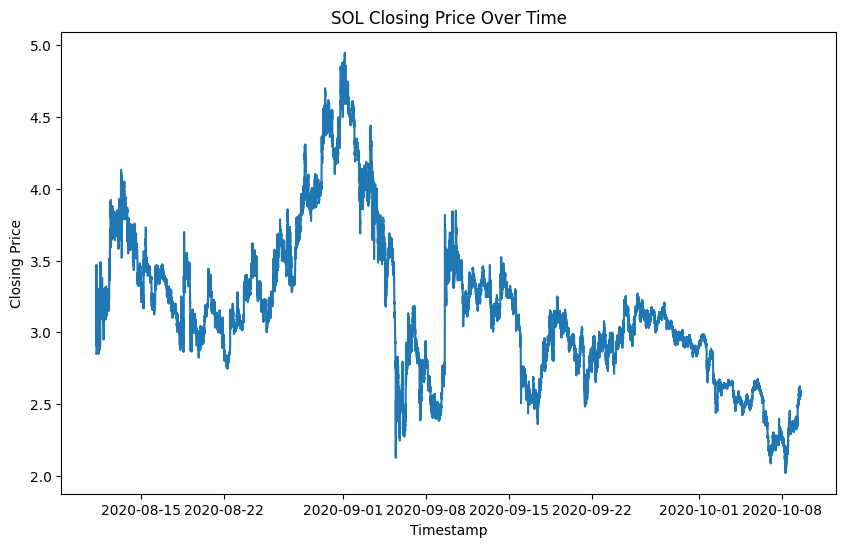

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


sol['timestamp'] = pd.to_datetime(sol['timestamp'])


plt.figure(figsize=(10,6))
sns.lineplot(data=sol, x='timestamp', y='close')
plt.title('SOL Closing Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.show()



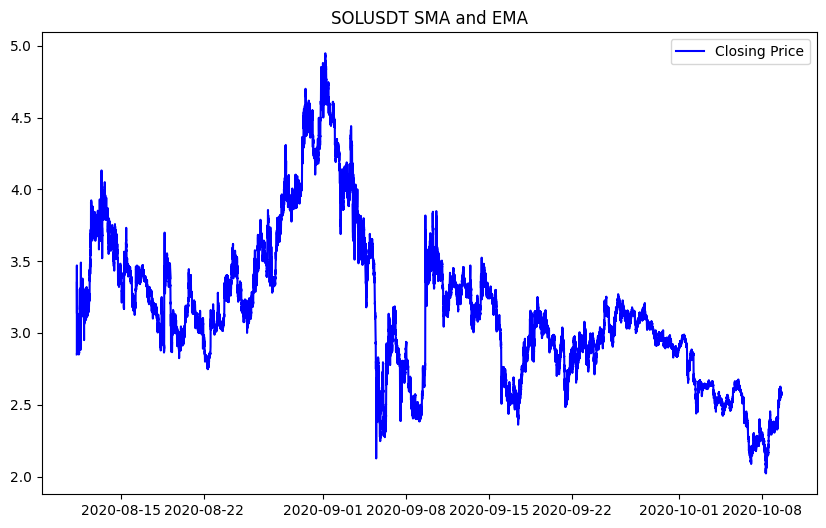

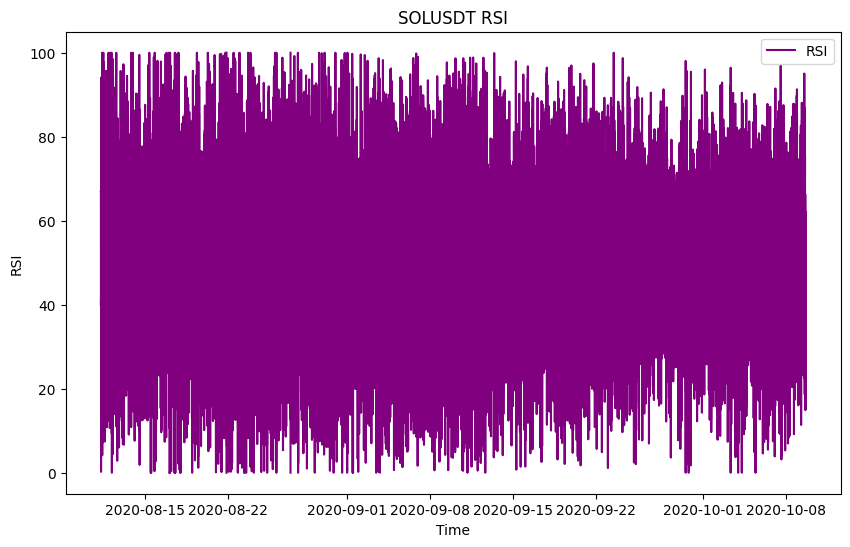

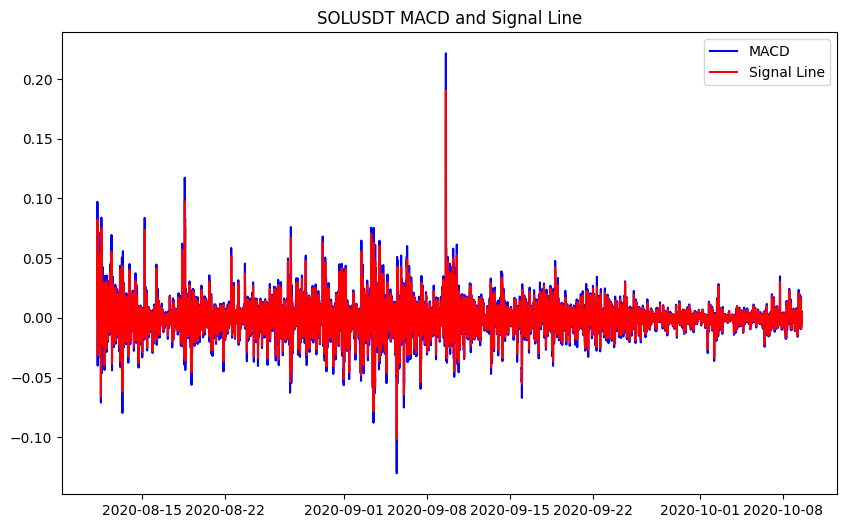

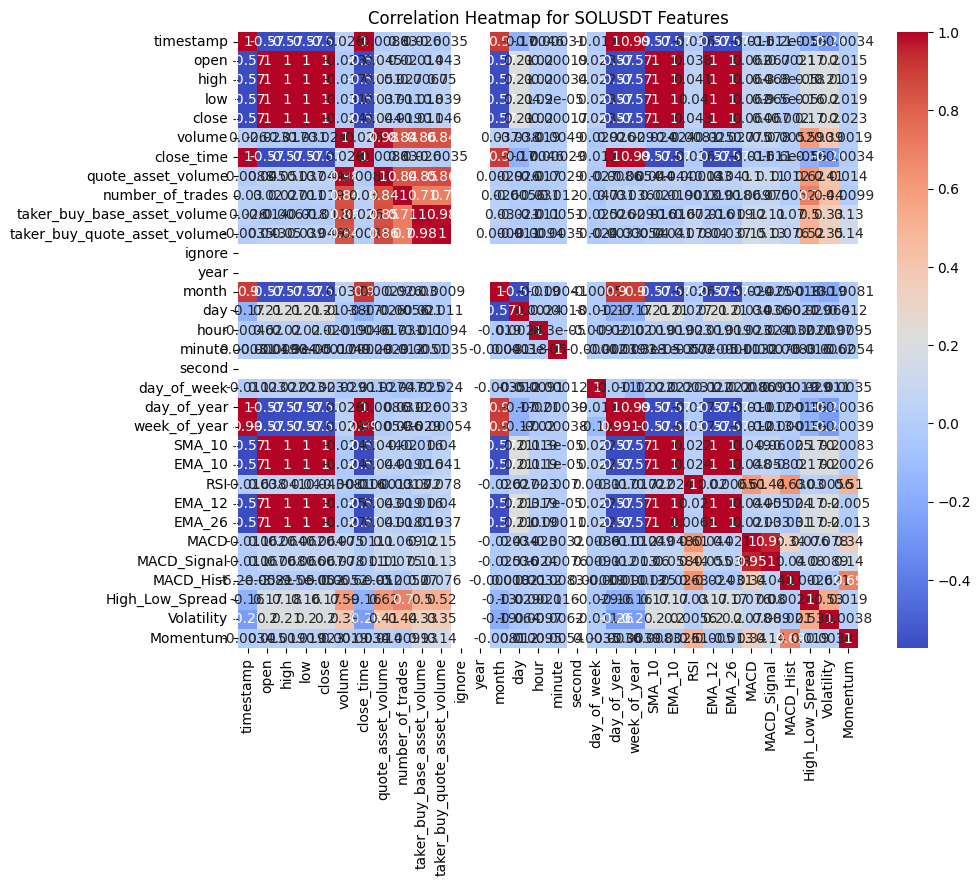

In [13]:

#Moving Averages
plt.figure(figsize=(10,6))
plt.plot(sol['timestamp'], sol['close'], label='Closing Price', color='blue')

plt.title('SOLUSDT SMA and EMA')
plt.legend()
plt.show()

#RSI
plt.figure(figsize=(10,6))
plt.plot(sol['timestamp'], sol['RSI'], label='RSI', color='purple')
plt.title('SOLUSDT RSI')
plt.xlabel('Time')
plt.ylabel('RSI')
plt.legend()
plt.show()

#MACD and Signal Line
plt.figure(figsize=(10,6))
plt.plot(sol['timestamp'], sol['MACD'], label='MACD', color='blue')
plt.plot(sol['timestamp'], sol['MACD_Signal'], label='Signal Line', color='red')
plt.title('SOLUSDT MACD and Signal Line')
plt.legend()
plt.show()

# Correlation heatmap of features
plt.figure(figsize=(10,8))
sns.heatmap(sol.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for SOLUSDT Features')
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler


features = ['open', 'high', 'low', 'close', 'volume', 'SMA_10', 'EMA_10', 'RSI', 'MACD_Hist', 'High_Low_Spread', 'Momentum', 'Volatility']
scaler = StandardScaler()


sol_scaled = pd.DataFrame(scaler.fit_transform(sol[features]), columns=features)


In [15]:

sol['Target'] = (sol['close'].shift(-1) > sol['close']).astype(int)


sol = sol[:-1]


In [67]:

sol['Target'] = (sol['close'].shift(-1) > sol['close']).astype(int)


sol = sol[:-1]


In [16]:
from sklearn.model_selection import train_test_split


features = ['open', 'high', 'low', 'close', 'volume', 'SMA_10', 'EMA_10', 'RSI', 'MACD_Hist', 'High_Low_Spread', 'Momentum', 'Volatility']


X = sol[features]
y = sol['Target']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [17]:
import xgboost as xgb


In [16]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:11:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:11:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:11:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:11:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:11:21] WARNING: /worksp

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.6}


In [70]:
# 'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.6
from sklearn.metrics import accuracy_score
xgb_model = xgb.XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.01,
    max_depth=10,
    n_estimators=50,
    subsample=0.6,
)


xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')




Accuracy: 0.61


In [17]:
from sklearn.metrics import accuracy_score